## ***Covid-19 Detection Using CNN***

Importing all the required functions

In [67]:
import numpy as np                                                              # numpy used to Data Handling
import matplotlib.pyplot as plt                                                 # Used for Graph Generation  
import os                                                                       # Used for file handling   
import keras
from keras.models import Sequential                                             # Used to creat model in concatination (one_layer_ofter_other)
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense             # All the needed tooles to creat model 
from keras.preprocessing.image import ImageDataGenerator                        # Used conver image into dataset
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix             # Used to set the parameters and hyperparameters
import seaborn as sns                                                           # Python data visualization library
import tensorflow as tf                                                         # Used to save and load the developed models


In [ ]:
from google.colab import drive                                                  # Connecting the colabe notebook to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Path of the folders where the trainging and test dataset are saved

In [ ]:
Train_path = "/content/drive/MyDrive/Covid-19_Dataset/Processed data/Train"     # loading the path were the training dataset is saved
Test_path = "/content/drive/MyDrive/Covid-19_Dataset/Processed data/Test"       # loading the path were the test dataset is saved

## ***Image and Data visualization***

***Image Visualization***

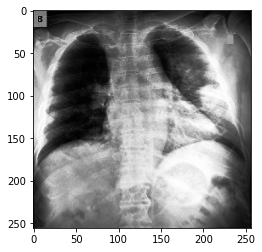

In [ ]:
# Displaying a image form our dataset
# path of the location where the image is saved
path = "/content/drive/MyDrive/Covid-19_Dataset/Processed data/Test/Covid_img_test/0108.jpeg" 
# Path, target_size = {size at which the image is displayed}
img = image.load_img(path, target_size=(256,256))              
plt.imshow(img)                                                                 # showing the image

### ***Image to data Conversition***

In [ ]:
# Converting RGB image into Dataset (array) and scaling them down by (1/255)
# Taining dataset
train = ImageDataGenerator(rescale=1/255)  
# Test dataset
test = ImageDataGenerator(rescale=1/255)  

***Data Visualization***

In [ ]:
# Seperating our dataset into "batches" to be supplied in groups
train_dataset = train.flow_from_directory(Train_path,
                                          target_size = (224, 224),
                                          batch_size = 32)
                                     
test_dataset = test.flow_from_directory(Test_path,
                                          target_size= (224, 224),
                                          batch_size = 32 )

Found 425 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


Understanding the data in the dataset

In [ ]:
train_dataset.class_indices                                                     # Displaying the different types of data

{'Covid_img_train': 0, 'Normal_img_train': 1}

In [ ]:
test_dataset.classes                                                            # Visualizing the difference between the data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

## ***CNN Basic Model in Keras***

In [ ]:
# Creating a CNN model

model = Sequential()                                                            # Creating a model named "model" which will be sequential
# Input layer (Raw Image)
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',...                      
                 input_shape=(150,150,3)))                                      # First layer (Input layer), 1st Convolution layer with 32 filters of size 3*3, relu activation
                                   
# Second layer of Convolution
model.add(Conv2D(64,(3,3), activation='relu'))                                  # 2nd layer, 2st Convolution layer with 64 filters of size 3*3, relu activation
model.add(MaxPool2D(2,2))                                                       # Pooldown layer of size 2*2                               
model.add(Dropout(0.25))                                                        # fitting the model  

# Third layer of Convolution
model.add(Conv2D(128,(3,3), activation='relu'))                                 # 3rd layer, 3rd Convolution layer with 128 filters of size 3*3, relu activation
model.add(MaxPool2D(2,2))                                                       # Pooldown layer of size 2*2  
model.add(Dropout(0.25))                                                        # fitting the model 


Data *Flattening*

In [ ]:
#flattening the data into Column matrix
model.add(Flatten())                                                            # Converting the matrix into column matrix
model.add(Dense(128,activation='relu'))                                         # Dense layer with relu activation
model.add(Dropout(0.5))                                                         # fitting the model
model.add(Dense(1,activation='sigmoid'))                                        # Final output layer with sigmoid activation

# Setting hyperparameter modeling, backward propagation, lossfunction, Gradient Decent
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])


In [ ]:
# Getting the Summary of the designed model with parameter of respective layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                    

Flowchart

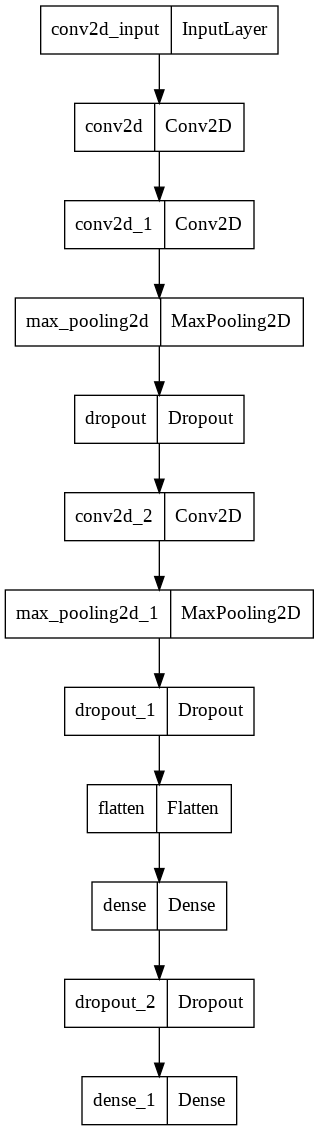

In [ ]:
# Getting the Flow chart of the designed model
from keras.utils.vis_utils import plot_model
plot_model(model)

### ***Training the Model***

In [ ]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Conveting RGB images into dataset in batch of 32 images at a time
train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
)

Found 425 images belonging to 2 classes.


In [ ]:
# Conveting RGB images into dataset in batch of 32 images at a time
test_generator = test_dataset.flow_from_directory(
    Test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 66 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,                                                          # Total number of steps (batches of samples) to yield from generator
    epochs=15,                                                                  # an instant in time chosen as the origin of a particular calendar era
    validation_data = test_generator,                                           # test the test datset
    validation_steps=2,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
8/8 [==============================] - 59s 6s/step - loss: 1.2732 - accuracy: 0.5064 - val_loss: 0.6768 - val_accuracy: 0.9062
Epoch 2/15
8/8 [==============================] - 23s 3s/step - loss: 0.6304 - accuracy: 0.6172 - val_loss: 0.6322 - val_accuracy: 0.5469
Epoch 3/15
8/8 [==============================] - 20s 3s/step - loss: 0.5085 - accuracy: 0.7500 - val_loss: 0.3388 - val_accuracy: 0.9062
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 0.2940 - accuracy: 0.8516 - val_loss: 0.1877 - val_accuracy: 0.9375
Epoch 5/15
8/8 [==============================] - 14s 2s/step - loss: 0.3731 - accuracy: 0.8755 - val_loss: 0.2514 - val_accuracy: 0.9219
Epoch 6/15
8/8 [==============================] - 15s 2s/step - loss: 0.3257 - accuracy: 0.8755 - val_loss: 0.2024 - val_accuracy: 0.9375
Epoch 7/15
8/8 [==============================] - 14s 2s/step - loss: 0.3061 - accuracy: 0.8927 - val_loss: 0.4079 - val_accuracy: 0.9375
Epoch 8/15
8/8 [==================

**Accuracy**

In [129]:
# Evaluating the loss and Accuracy of the model
model.evaluate(test_generator)

3/3 [==============================] - 2s 451ms/step - loss: 0.1889 - accuracy: 0.9697


[0.1889021098613739, 0.9696969985961914]

***Saving the generated model***

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [128]:
# Creating a folder to save the model generated
!mkdir -p saved_model
model.save('/content/savedmodel/covid.h5') 

### ***Graphical Representation of Ouput***

In [ ]:
h = hist.history                                                                # Used to Generat the graph
h.keys()                                                                        # Checking different parametes that we obtained after training the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Accuracy Graph With respect to no of iterations

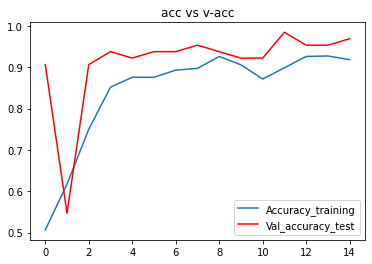

In [ ]:
# Grpah of the Accuracy of Training dataset v/s Test dataset
plt.plot(h['accuracy'], label="Accuracy_training")
plt.plot(h['val_accuracy'] , c = "red", label="Val_accuracy_test")
plt.title("acc vs v-acc")
plt.legend()
plt.show()

Loss Graph With respect to no of iterations

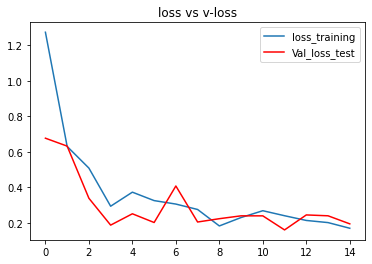

In [ ]:
# Grpah of the Loss of Training dataset v/s Test dataset
plt.plot(h['loss'],label="loss_training")
plt.plot(h['val_loss'] , c = "red",label="Val_loss_test")
plt.title("loss vs v-loss")
plt.legend()
plt.show()

***Accuracy V/S Loss Graph***

(0.0, 1.5)

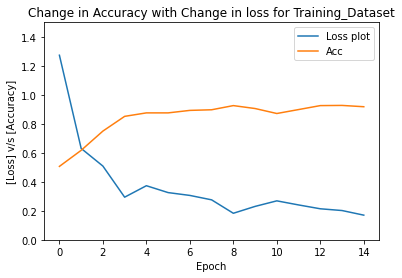

In [ ]:
#Graph of Accuracy v/s loss of Training dataset 
plt.figure()
plt.title("Change in Accuracy with Change in loss for Training_Dataset")
plt.xlabel('Epoch')
plt.ylabel('[Loss] v/s [Accuracy]')
plt.plot([i for i in range(15)], h['loss'], label='Loss plot')
plt.plot([i for i in range(15)], h['accuracy'], label = 'Acc')
plt.legend()
plt.ylim([0,1.5])

(0.0, 1.5)

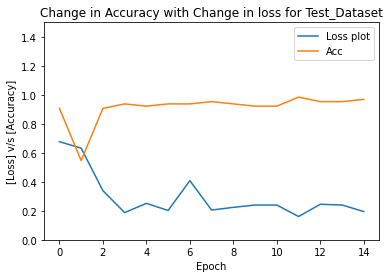

In [ ]:
#Graph of Accuracy v/s loss of Test dataset 
plt.figure()
plt.title("Change in Accuracy with Change in loss for Test_Dataset")
plt.xlabel('Epoch')
plt.ylabel('[Loss] v/s [Accuracy]')
plt.plot([i for i in range(15)], h['val_loss'], label='Loss plot')
plt.plot([i for i in range(15)], h['val_accuracy'], label = 'Acc')
plt.legend()
plt.ylim([0,1.5])


Output checking

**Loading the saved Model**

In [63]:
# Loading the saved model from memory
loaded_model = tf.keras.models.load_model('covid.h5')
#printing the size of the input layer of the model
loaded_model.layers[0].input_shape

(None, 150, 150, 3)

# ***prediction models***

1.0
Covid-19 Negative.


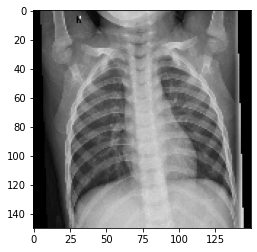

In [64]:
# Path of the image which has to be tested
image_path="/content/drive/MyDrive/Covid-19_Dataset/Processed data/Test/Normal_img_test/NORMAL2-IM-0130-0001.jpeg"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
# printing the output whether the image is of Covid or Non-Covid image
if result[0][0] == 0.0:
  print("Covid-19 Positive.")
else:
  print(result[0][0])
  print("Covid-19 Negative.")
plt.show()

# ***Model Visulization of Test Dataset***

In [ ]:
# Predicated output values from the image
predicted_classes = []
for filename in os.listdir("/content/drive/MyDrive/Covid-19_Dataset/Processed data/Test/Covid_img_test"):
  img = image.load_img("/content/drive/MyDrive/Covid-19_Dataset/Processed data/Test/Covid_img_test/"+filename, target_size=(150, 150))
  img = np.expand_dims(img, axis=0)
  result=loaded_model.predict(img)
  predicted_classes.append(int(result[0][0]))
for filename in os.listdir("/content/drive/MyDrive/Covid-19_Dataset/Processed data/Test/Normal_img_test"):
  img = image.load_img("/content/drive/MyDrive/Covid-19_Dataset/Processed data/Test/Normal_img_test/"+filename, target_size=(150, 150))
  img = np.expand_dims(img, axis=0)
  result=loaded_model.predict(img)
  predicted_classes.append(int(result[0][0]))


In [ ]:
print(predicted_classes)
predicted_classes = np.array(predicted_classes)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Orginal output values
true_classes = test_dataset.classes
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

***Mismatch Image***

In [ ]:
# The mismatched images
mismatch = []
for i in range(len(predicted_classes)):
  if predicted_classes[i] != true_classes[i]:
    mismatch.append(i+1)
print("This are the images which have been mismatched:",mismatch)

This are the images which have been mismatched: [2, 5, 42]


***Report***

In [ ]:
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 

In [ ]:
# Report of the tested dataset analysis
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                 precision    recall  f1-score   support

 Covid_img_test       0.96      0.92      0.94        26
Normal_img_test       0.95      0.97      0.96        40

       accuracy                           0.95        66
      macro avg       0.96      0.95      0.95        66
   weighted avg       0.95      0.95      0.95        66



***Confusion Matrix***

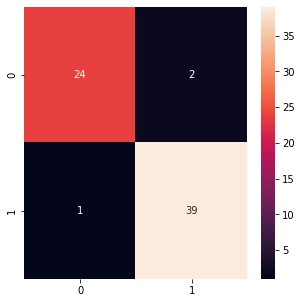

In [65]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True)

# ***Thank You***








---

